In [ ]:
!pip install scikit-posthocs

     |████████████████████████████████| 51kB 1.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-cp37-none-any.whl size=37903 sha256=3267d81de28d585c936fa91b0c7ba703b6d2d6f627207d5c99b57217ca68aefd
  Stored in directory: /root/.cache/pip/wheels/00/0f/56/897c22820a48a74f50f1a85faaa4b133bb8865e8b094b596f5
Successfully built scikit-posthocs


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
import scikit_posthocs as sp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pop = pd.read_csv('Pop_Fig2 (1).csv')
deaths = pd.read_csv('Death_Fig2 (1).csv')
cases = pd.read_csv('Infection_Fig2 (1).csv')

In [ ]:
ne_pop = pop[pop['Region'] == 'Northeast']
ne_deaths = deaths[deaths['Region'] == 'Northeast']
ne_cases = cases[cases['Region'] == 'Northeast']

In [ ]:
p_data = ne_pop[ne_pop['Race/Ethnicity'] == 'African-American']
i_data = ne_cases[ne_cases['Race/Ethnicity'] == 'African-American']
d_data = ne_deaths[ne_deaths['Race/Ethnicity'] == 'African-American']

In [ ]:
print('Pop_Fig2 - Northeast - NHB')
p_data

Pop_Fig2 - Northeast - NHB


,Unnamed: 0,State,Region,Race/Ethnicity,% of Population
201,202,Connecticut,Northeast,African-American,10
205,206,Maine,Northeast,African-American,1
209,210,Massachusetts,Northeast,African-American,7
213,214,New Hampshire,Northeast,African-American,1
217,218,New Jersey,Northeast,African-American,13
221,222,New York,Northeast,African-American,14
225,226,Pennsylvania,Northeast,African-American,11
229,230,Rhode Island,Northeast,African-American,6
233,234,Vermont,Northeast,African-American,1


In [ ]:
print('Infection_Fig2 - Northeast - NHB')
i_data

Infection_Fig2 - Northeast - NHB


,Unnamed: 0,State,Region,Race/Ethnicity,% of Population
197,198,Vermont,Northeast,African-American,10
201,202,New Hampshire,Northeast,African-American,5
205,206,Maine,Northeast,African-American,20
209,210,Pennsylvania,Northeast,African-American,24
213,214,Connecticut,Northeast,African-American,18
217,218,Massachusetts,Northeast,African-American,13
221,222,New Jersey,Northeast,African-American,16
225,226,Rhode Island,Northeast,African-American,12


In [ ]:
print('Deaths_Fig2 - Northeast - NHB')
d_data

Deaths_Fig2 - Northeast - NHB


,Unnamed: 0,State,Region,Race/Ethnicity,% of Population
189,190,Connecticut,Northeast,African-American,15
193,194,Maine,Northeast,African-American,3
197,198,Massachusetts,Northeast,African-American,8
201,202,New Hampshire,Northeast,African-American,2
205,206,New Jersey,Northeast,African-American,18
209,210,New York,Northeast,African-American,22
213,214,Pennsylvania,Northeast,African-American,20
217,218,Rhode Island,Northeast,African-American,5
221,222,Vermont,Northeast,African-American,0


In [ ]:
kruskal(p_data['% of Population'], d_data['% of Population'], i_data['% of Population'])

KruskalResult(statistic=4.571104347660431, pvalue=0.1017178806449877)

In [ ]:
from scipy.stats import mstats

mstats.kruskalwallis(p_data['% of Population'].tolist(), d_data['% of Population'].tolist(), i_data['% of Population'].tolist())

KruskalResult(statistic=4.571104347660431, pvalue=0.1017178806449877)

White
Population Kruskal-Wallis KruskalResult(statistic=2.9088196349641993, pvalue=0.2335381533720663)
          1         2         3
1  1.000000  0.117261  0.865204
2  0.117261  1.000000  0.161007
3  0.865204  0.161007  1.000000
African-American
Population Kruskal-Wallis KruskalResult(statistic=4.571104347660431, pvalue=0.1017178806449877)
          1         2         3
1  1.000000  0.032738  0.346521
2  0.032738  1.000000  0.221694
3  0.346521  0.221694  1.000000
Hispanic
Population Kruskal-Wallis KruskalResult(statistic=5.186706213400272, pvalue=0.07476891115261945)
          1         2         3
1  1.000000  0.088198  0.621787
2  0.088198  1.000000  0.028994
3  0.621787  0.028994  1.000000
Asian
Population Kruskal-Wallis KruskalResult(statistic=4.590241099374034, pvalue=0.10074924724599611)
          1         2         3
1  1.000000  0.310337  0.032169
2  0.310337  1.000000  0.287410
3  0.032169  0.287410  1.000000


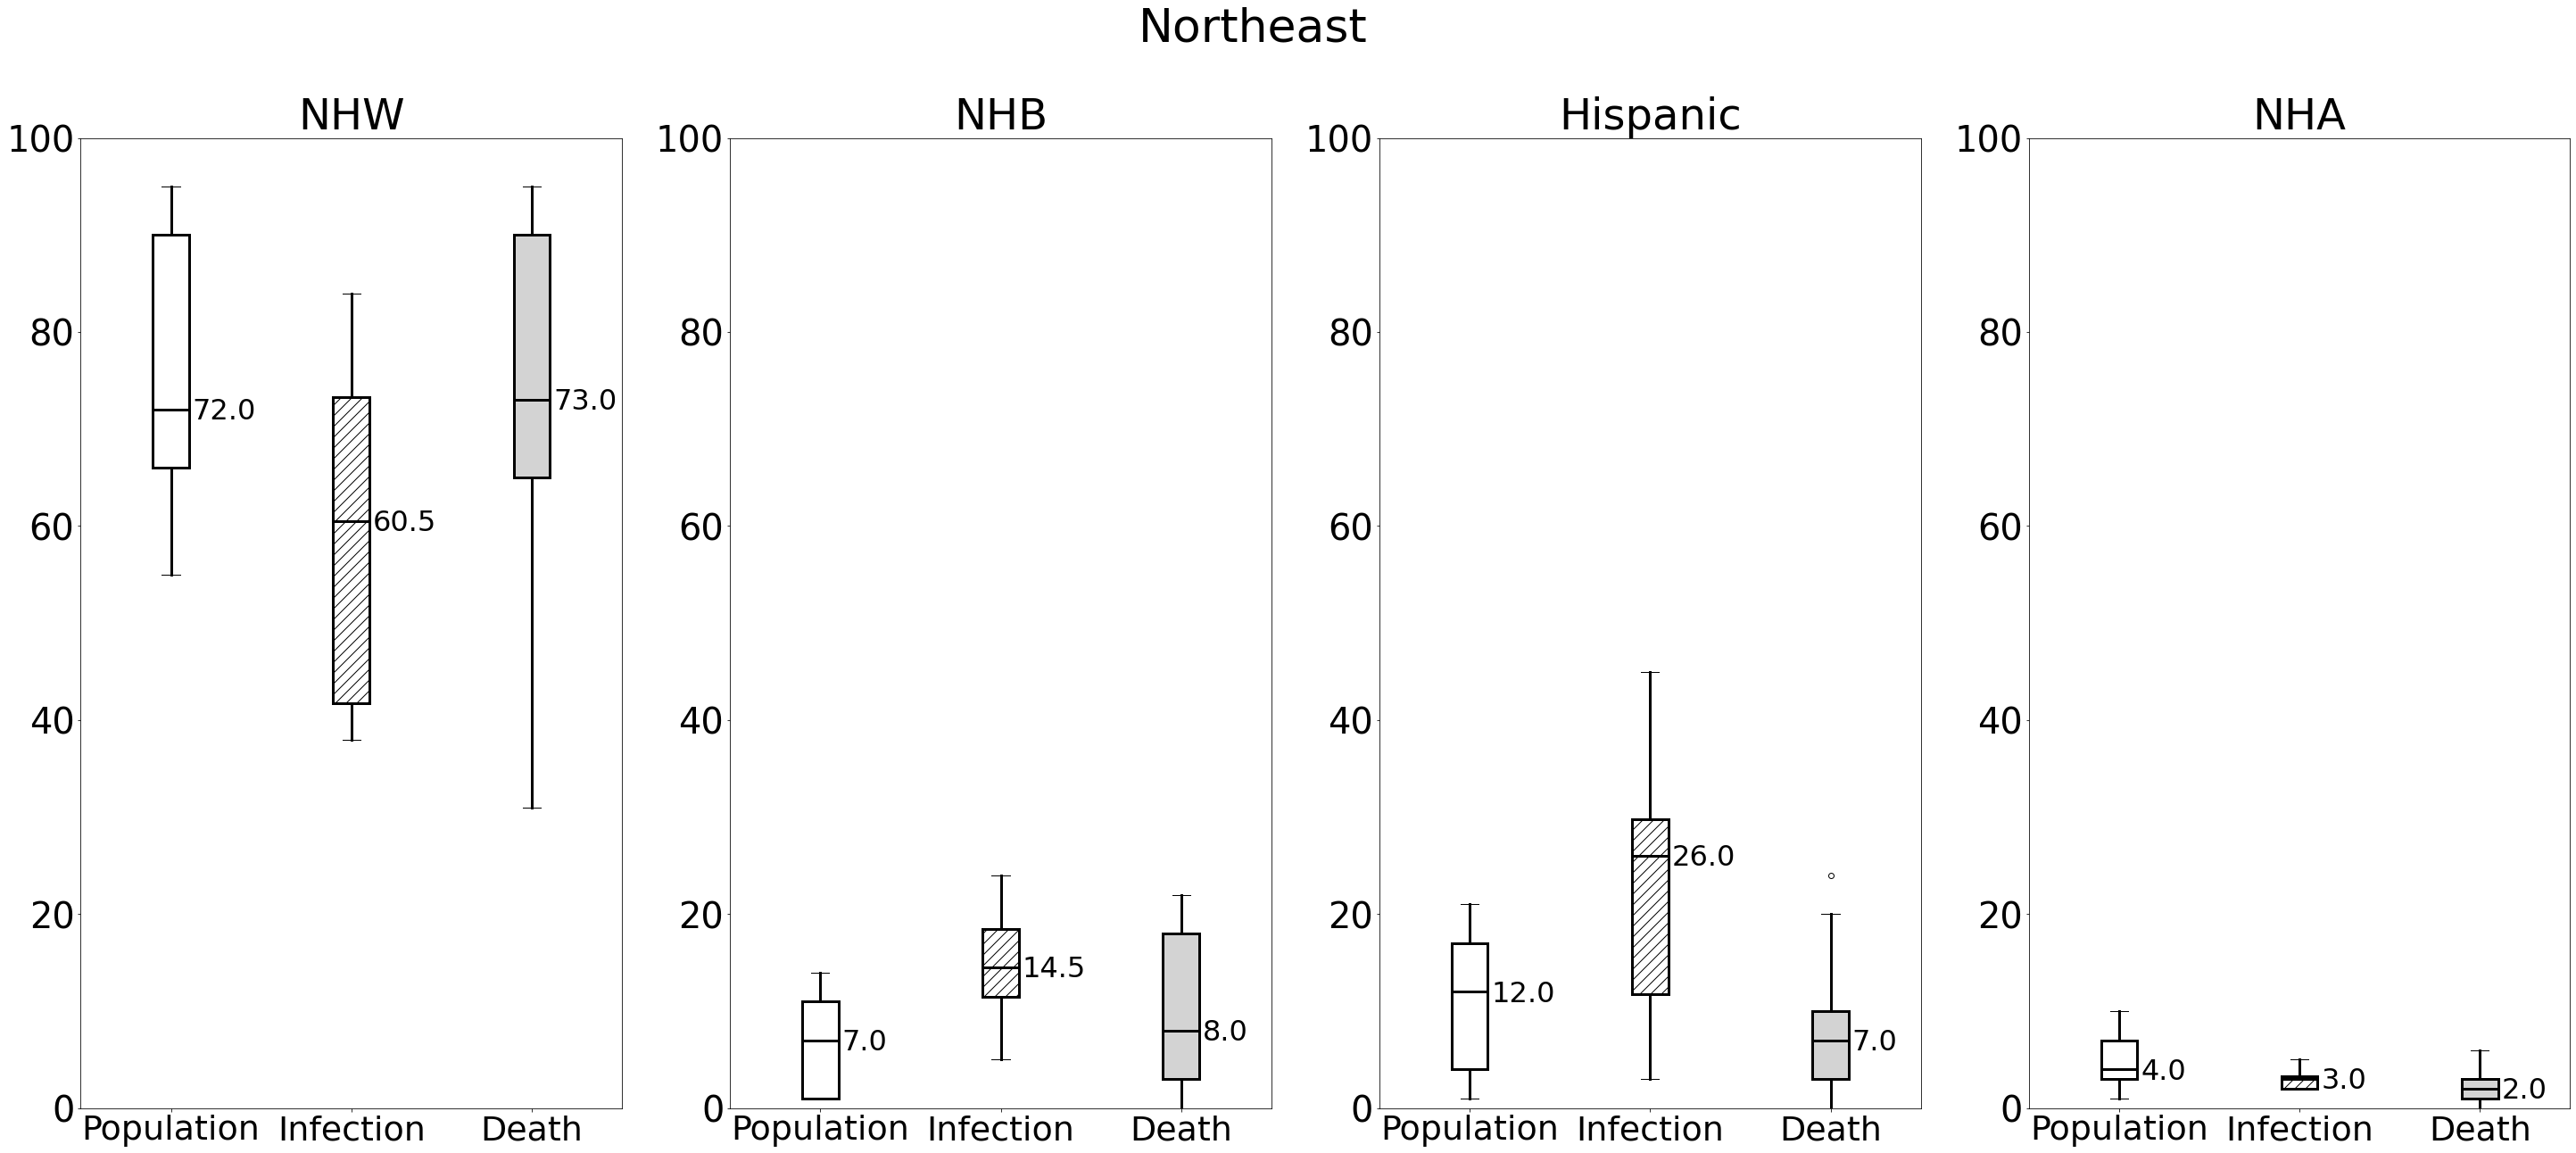

In [ ]:
raceindex = [1, 2, 3, 4]
race = ['', 'White', 'African-American', 'Hispanic', 'Asian']
racename = ['', 'NHW', 'NHB', 'Hispanic', 'NHA']

ne_pop = pop[pop['Region'] == 'Northeast']
ne_deaths = deaths[deaths['Region'] == 'Northeast']
ne_cases = cases[cases['Region'] == 'Northeast']

fig, ax = plt.subplots(1, 4,figsize=(50,20))

for i in raceindex:
  p_data = ne_pop[ne_pop['Race/Ethnicity'] == race[i]]
  i_data = ne_cases[ne_cases['Race/Ethnicity'] == race[i]]
  d_data = ne_deaths[ne_deaths['Race/Ethnicity'] == race[i]]

  q2_p = [np.quantile(p_data['% of Population'].to_list(), 0.5)]
  q2_i = [np.quantile(i_data['% of Population'].to_list(), 0.5)]
  q2_d = [np.quantile(d_data['% of Population'].to_list(), 0.5)]

  pdata = []
  pdata.append(p_data['% of Population'].tolist())
  pdata.append(i_data['% of Population'].tolist())
  pdata.append(d_data['% of Population'].tolist())
  
  c = 'black'
  bp = ax[i-1].boxplot(pdata[0], labels = ['Population'], positions = [1], patch_artist=True, widths=0.2,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  # for box in bp['boxes']:
  #     box.set(hatch = '\\')
  
  c = 'black'
  bp = ax[i-1].boxplot(pdata[1], labels = ['Infection'], positions = [2], patch_artist=True, widths=0.2,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  for box in bp['boxes']:
      box.set(hatch = '//')

  c = 'black'
  bp = ax[i-1].boxplot(pdata[2], labels = ['Death'], positions = [3], patch_artist=True, widths=0.2,
            boxprops=dict(facecolor='lightgray', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  # for box in bp['boxes']:
  #     box.set(hatch = '//')

  ax[i-1].text(1+0.12, q2_p[0]-1, str(round(q2_p[0],2)), fontsize = 32)
  ax[i-1].text(2+0.12, q2_i[0]-1, str(round(q2_i[0],2)), fontsize = 32)
  ax[i-1].text(3+0.12, q2_d[0]-1, str(round(q2_d[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=38)

  ax[i-1].set_ylim(0, 100)

  ax[i-1].set_title(racename[i], fontsize = 48)

  print(race[i])
  print('Population Kruskal-Wallis', kruskal(p_data['% of Population'].tolist(), i_data['% of Population'].tolist(), d_data['% of Population'].tolist()))
  print(sp.posthoc_dunn([p_data['% of Population'].tolist(), i_data['% of Population'].tolist(), d_data['% of Population'].tolist()]))

plt.text(-3.8, 110, 'Northeast',
         horizontalalignment='center',
         fontsize=52)
plt.savefig("Northeast.svg")
plt.show()

White
Population Kruskal-Wallis KruskalResult(statistic=13.35425118431014, pvalue=0.0012593927833495723)
          1         2         3
1  1.000000  0.001745  0.001497
2  0.001745  1.000000  0.909662
3  0.001497  0.909662  1.000000
African-American
Population Kruskal-Wallis KruskalResult(statistic=6.142401835253967, pvalue=0.04636544033526989)
          1         2         3
1  1.000000  0.025922  0.041628
2  0.025922  1.000000  0.887710
3  0.041628  0.887710  1.000000
Hispanic
Population Kruskal-Wallis KruskalResult(statistic=7.567149730611275, pvalue=0.022741249036854032)
          1         2         3
1  1.000000  0.024597  0.776241
2  0.024597  1.000000  0.013047
3  0.776241  0.013047  1.000000
Asian
Population Kruskal-Wallis KruskalResult(statistic=1.9686881376579846, pvalue=0.3736842577189644)
         1         2         3
1  1.00000  0.659960  0.343630
2  0.65996  1.000000  0.168415
3  0.34363  0.168415  1.000000


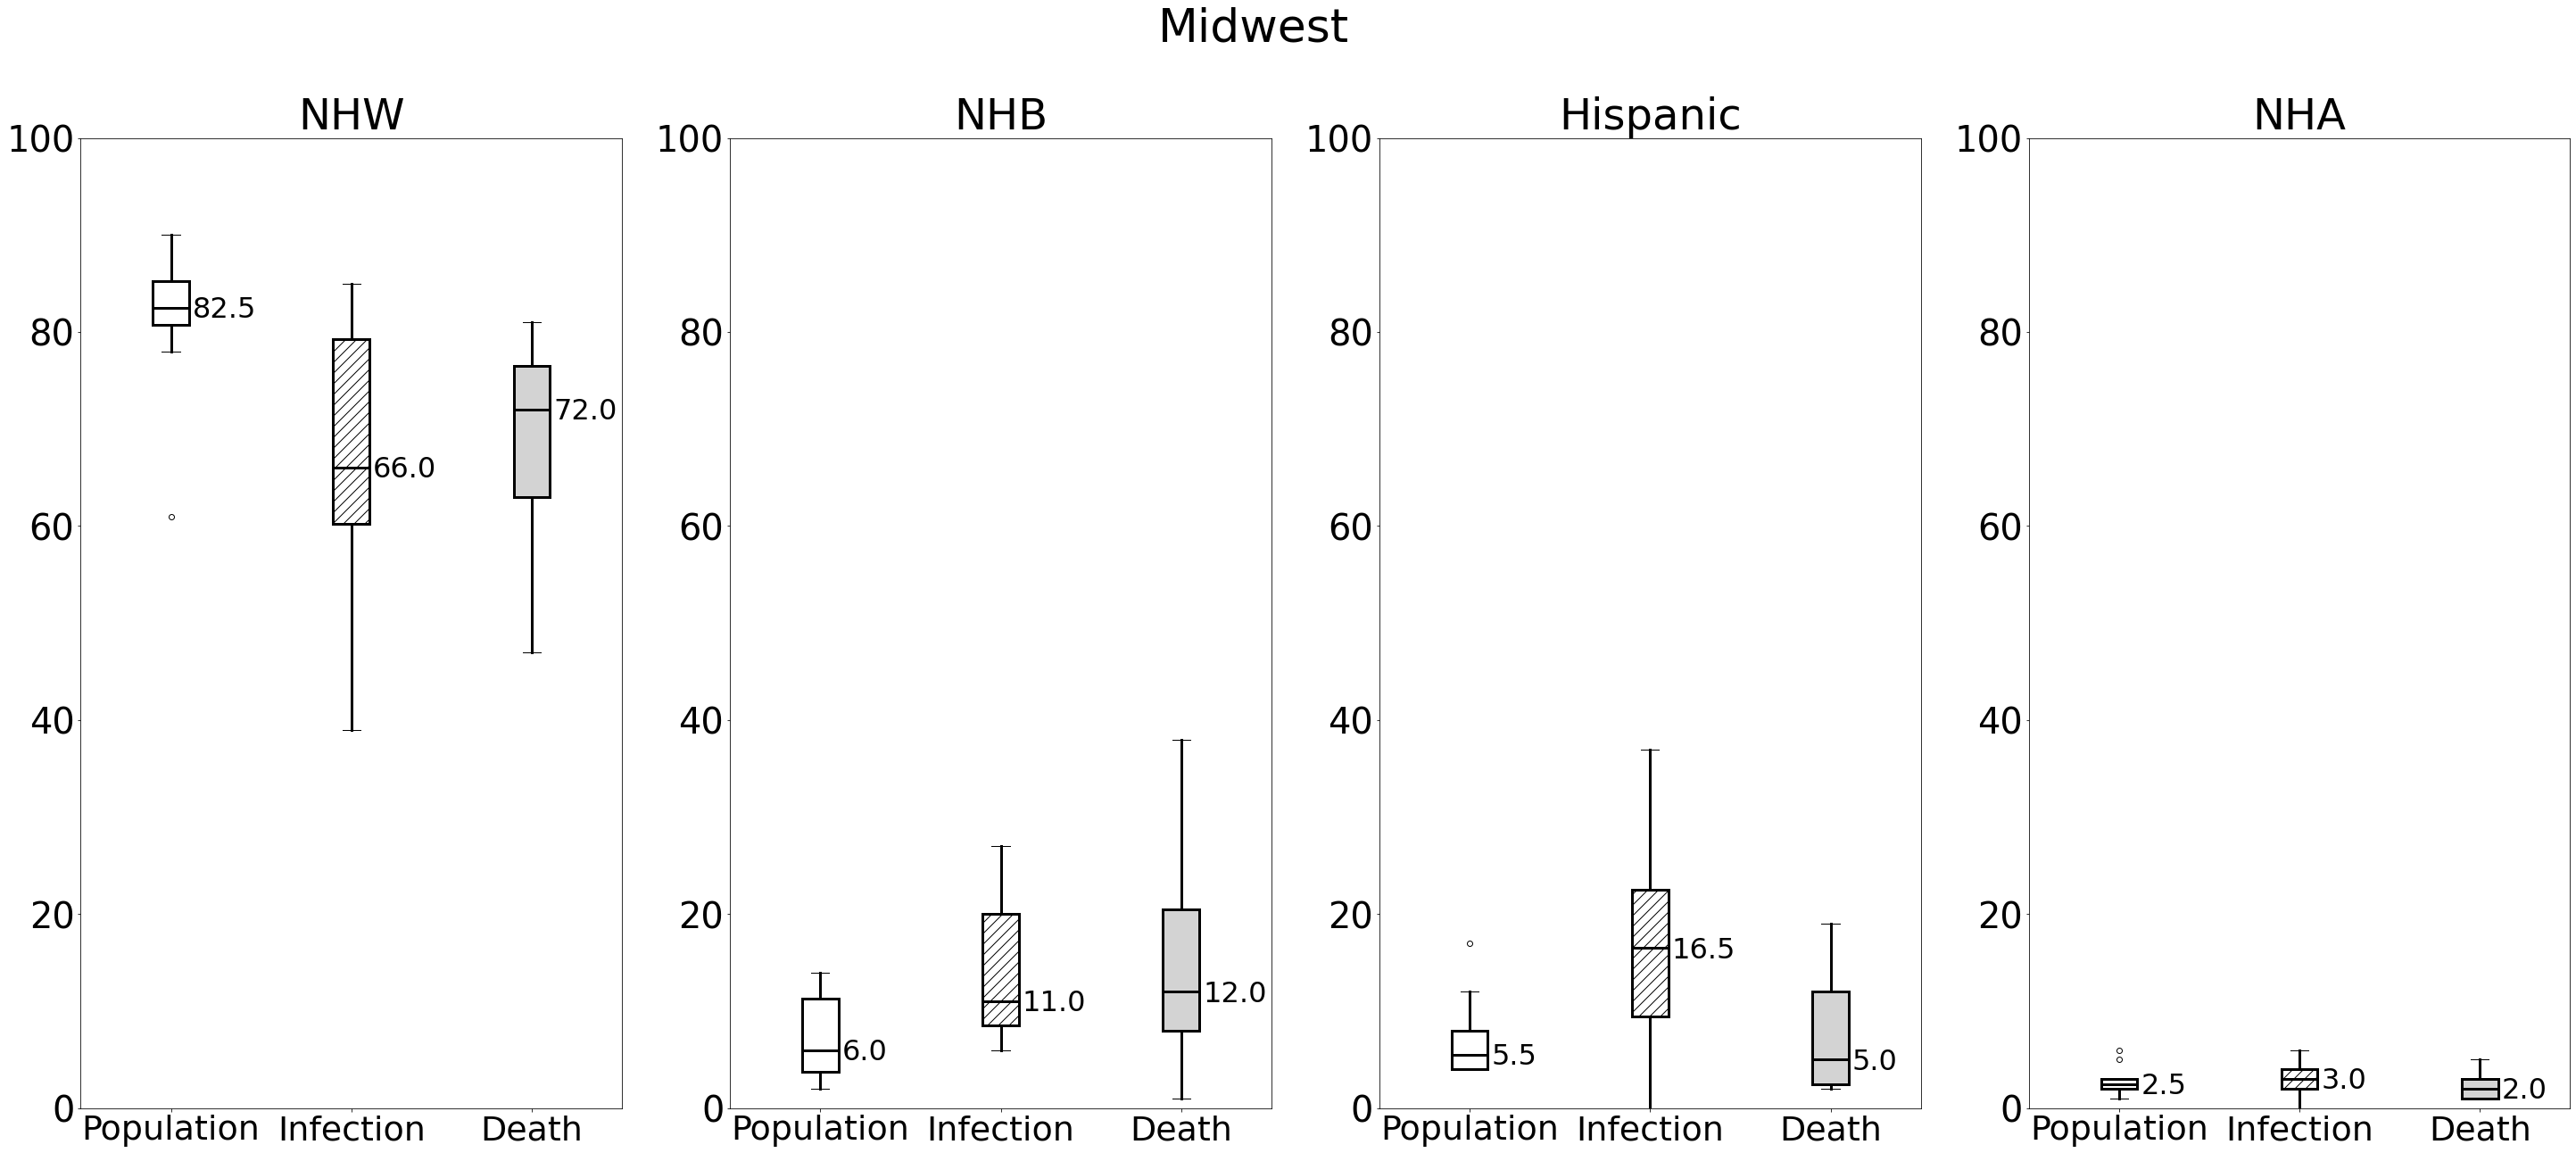

In [ ]:
raceindex = [1, 2, 3, 4]
race = ['', 'White', 'African-American', 'Hispanic', 'Asian']
racename = ['', 'NHW', 'NHB', 'Hispanic', 'NHA']

ne_pop = pop[pop['Region'] == 'Midwest']
ne_deaths = deaths[deaths['Region'] == 'Midwest']
ne_cases = cases[cases['Region'] == 'Midwest']

fig, ax = plt.subplots(1, 4,figsize=(50,20))

for i in raceindex:
  p_data = ne_pop[ne_pop['Race/Ethnicity'] == race[i]]
  i_data = ne_cases[ne_cases['Race/Ethnicity'] == race[i]]
  d_data = ne_deaths[ne_deaths['Race/Ethnicity'] == race[i]]

  q2_p = [np.quantile(p_data['% of Population'].to_list(), 0.5)]
  q2_i = [np.quantile(i_data['% of Population'].to_list(), 0.5)]
  q2_d = [np.quantile(d_data['% of Population'].to_list(), 0.5)]

  pdata = []
  pdata.append(p_data['% of Population'].tolist())
  pdata.append(i_data['% of Population'].tolist())
  pdata.append(d_data['% of Population'].tolist())
  
  c = 'black'
  bp = ax[i-1].boxplot(pdata[0], labels = ['Population'], positions = [1], patch_artist=True, widths=0.2,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  # for box in bp['boxes']:
  #     box.set(hatch = '\\')
  
  c = 'black'
  bp = ax[i-1].boxplot(pdata[1], labels = ['Infection'], positions = [2], patch_artist=True, widths=0.2,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  for box in bp['boxes']:
      box.set(hatch = '//')

  c = 'black'
  bp = ax[i-1].boxplot(pdata[2], labels = ['Death'], positions = [3], patch_artist=True, widths=0.2,
            boxprops=dict(facecolor='lightgray', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  # for box in bp['boxes']:
  #     box.set(hatch = '//')

  ax[i-1].text(1+0.12, q2_p[0]-1, str(round(q2_p[0],2)), fontsize = 32)
  ax[i-1].text(2+0.12, q2_i[0]-1, str(round(q2_i[0],2)), fontsize = 32)
  ax[i-1].text(3+0.12, q2_d[0]-1, str(round(q2_d[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=38)

  ax[i-1].set_ylim(0, 100)

  ax[i-1].set_title(racename[i], fontsize = 48)

  print(race[i])
  print('Population Kruskal-Wallis', kruskal(p_data['% of Population'].tolist(), i_data['% of Population'].tolist(), d_data['% of Population'].tolist()))
  print(sp.posthoc_dunn([p_data['% of Population'].tolist(), i_data['% of Population'].tolist(), d_data['% of Population'].tolist()]))
  
plt.text(-3.8, 110, 'Midwest',
         horizontalalignment='center',
         fontsize=52)
plt.savefig("Midwest.svg")
plt.show()

White
Population Kruskal-Wallis KruskalResult(statistic=6.4577741780071625, pvalue=0.039601547270264645)
          1         2         3
1  1.000000  0.011161  0.171562
2  0.011161  1.000000  0.257776
3  0.171562  0.257776  1.000000
African-American
Population Kruskal-Wallis KruskalResult(statistic=1.8215962096753417, pvalue=0.40220309566725226)
          1         2         3
1  1.000000  0.205585  0.302598
2  0.205585  1.000000  0.829302
3  0.302598  0.829302  1.000000
Hispanic
Population Kruskal-Wallis KruskalResult(statistic=8.924447758049821, pvalue=0.011536678560723285)
          1         2         3
1  1.000000  0.043164  0.358442
2  0.043164  1.000000  0.003619
3  0.358442  0.003619  1.000000
Asian
Population Kruskal-Wallis KruskalResult(statistic=6.784912664597051, pvalue=0.03362597879635479)
          1         2         3
1  1.000000  0.070602  0.011660
2  0.070602  1.000000  0.458183
3  0.011660  0.458183  1.000000


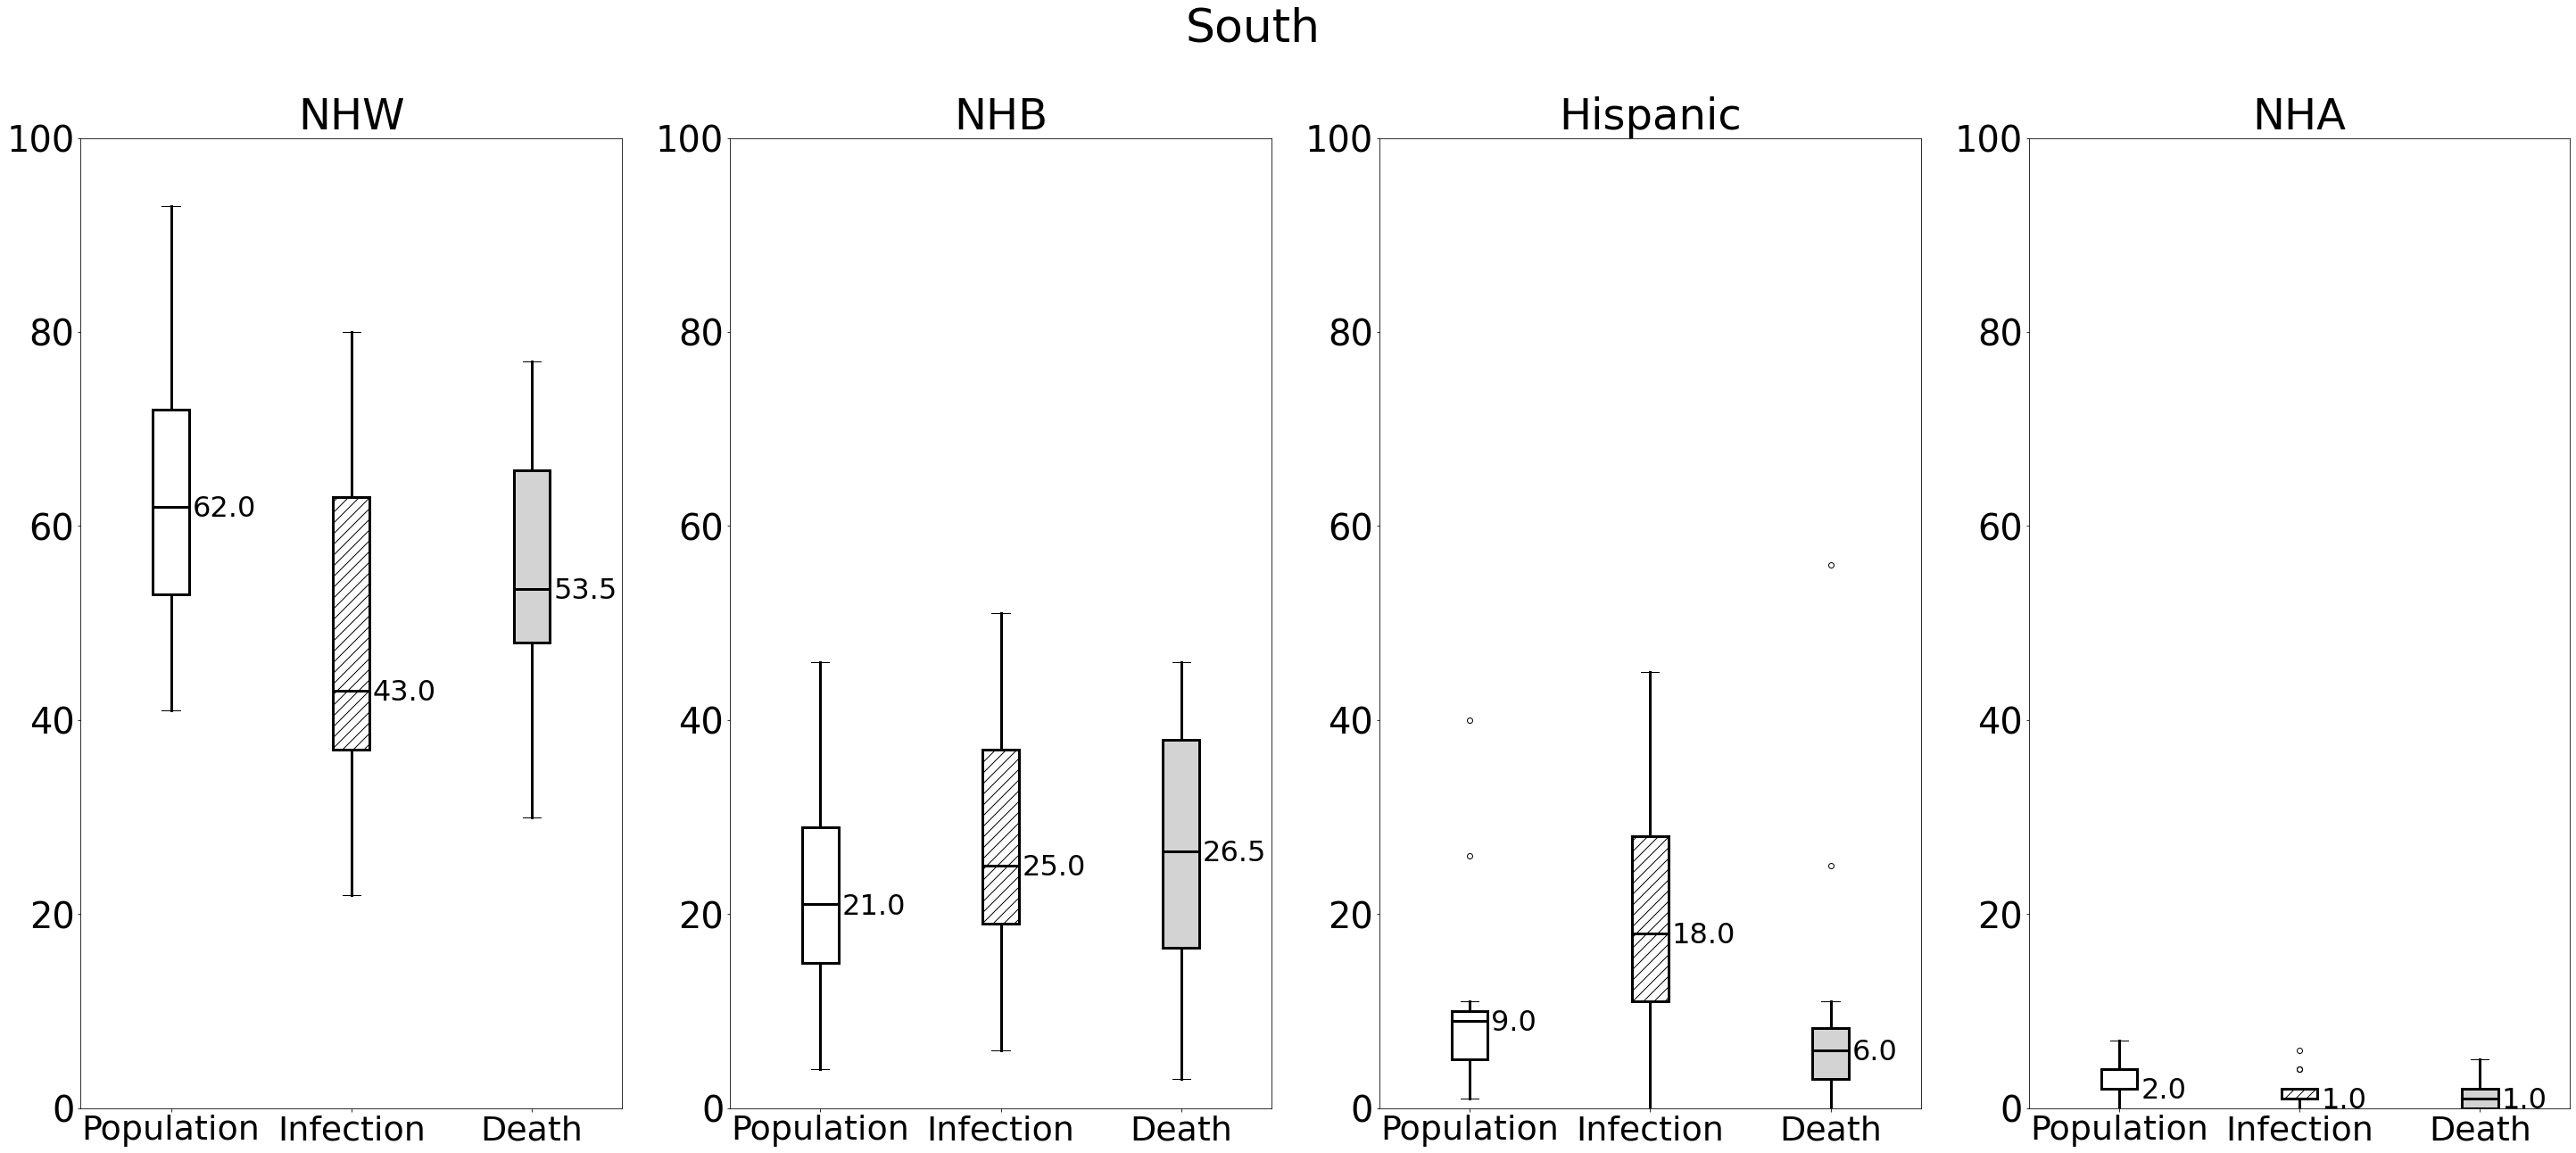

In [ ]:
raceindex = [1, 2, 3, 4]
race = ['', 'White', 'African-American', 'Hispanic', 'Asian']
racename = ['', 'NHW', 'NHB', 'Hispanic', 'NHA']

ne_pop = pop[pop['Region'] == 'South']
ne_deaths = deaths[deaths['Region'] == 'South']
ne_cases = cases[cases['Region'] == 'South']

fig, ax = plt.subplots(1, 4,figsize=(50,20))

for i in raceindex:
  p_data = ne_pop[ne_pop['Race/Ethnicity'] == race[i]]
  i_data = ne_cases[ne_cases['Race/Ethnicity'] == race[i]]
  d_data = ne_deaths[ne_deaths['Race/Ethnicity'] == race[i]]

  q2_p = [np.quantile(p_data['% of Population'].to_list(), 0.5)]
  q2_i = [np.quantile(i_data['% of Population'].to_list(), 0.5)]
  q2_d = [np.quantile(d_data['% of Population'].to_list(), 0.5)]

  pdata = []
  pdata.append(p_data['% of Population'].tolist())
  pdata.append(i_data['% of Population'].tolist())
  pdata.append(d_data['% of Population'].tolist())
  
  c = 'black'
  bp = ax[i-1].boxplot(pdata[0], labels = ['Population'], positions = [1], patch_artist=True, widths=0.2,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  # for box in bp['boxes']:
  #     box.set(hatch = '\\')
  
  c = 'black'
  bp = ax[i-1].boxplot(pdata[1], labels = ['Infection'], positions = [2], patch_artist=True, widths=0.2,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  for box in bp['boxes']:
      box.set(hatch = '//')

  c = 'black'
  bp = ax[i-1].boxplot(pdata[2], labels = ['Death'], positions = [3], patch_artist=True, widths=0.2,
            boxprops=dict(facecolor='lightgray', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  # for box in bp['boxes']:
  #     box.set(hatch = '//')

  ax[i-1].text(1+0.12, q2_p[0]-1, str(round(q2_p[0],2)), fontsize = 32)
  ax[i-1].text(2+0.12, q2_i[0]-1, str(round(q2_i[0],2)), fontsize = 32)
  ax[i-1].text(3+0.12, q2_d[0]-1, str(round(q2_d[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=38)

  ax[i-1].set_ylim(0, 100)

  ax[i-1].set_title(racename[i], fontsize = 48)

  print(race[i])
  print('Population Kruskal-Wallis', kruskal(p_data['% of Population'].tolist(), i_data['% of Population'].tolist(), d_data['% of Population'].tolist()))
  print(sp.posthoc_dunn([p_data['% of Population'].tolist(), i_data['% of Population'].tolist(), d_data['% of Population'].tolist()]))
  
plt.text(-3.8, 110, 'South',
         horizontalalignment='center',
         fontsize=52)
plt.savefig("South.svg")
plt.show()

White
Population Kruskal-Wallis KruskalResult(statistic=6.408388781250542, pvalue=0.04059158943428991)
          1         2         3
1  1.000000  0.016316  0.061170
2  0.016316  1.000000  0.633572
3  0.061170  0.633572  1.000000
African-American
Population Kruskal-Wallis KruskalResult(statistic=1.6294123610823543, pvalue=0.4427694025173404)
          1         2         3
1  1.000000  0.202184  0.564085
2  0.202184  1.000000  0.502517
3  0.564085  0.502517  1.000000
Hispanic
Population Kruskal-Wallis KruskalResult(statistic=7.180010125117535, pvalue=0.027598190705433297)
          1         2         3
1  1.000000  0.020693  0.961813
2  0.020693  1.000000  0.020857
3  0.961813  0.020857  1.000000
Asian
Population Kruskal-Wallis KruskalResult(statistic=1.3849972153505627, pvalue=0.5003243916267675)
          1         2         3
1  1.000000  0.264818  0.828176
2  0.264818  1.000000  0.382378
3  0.828176  0.382378  1.000000


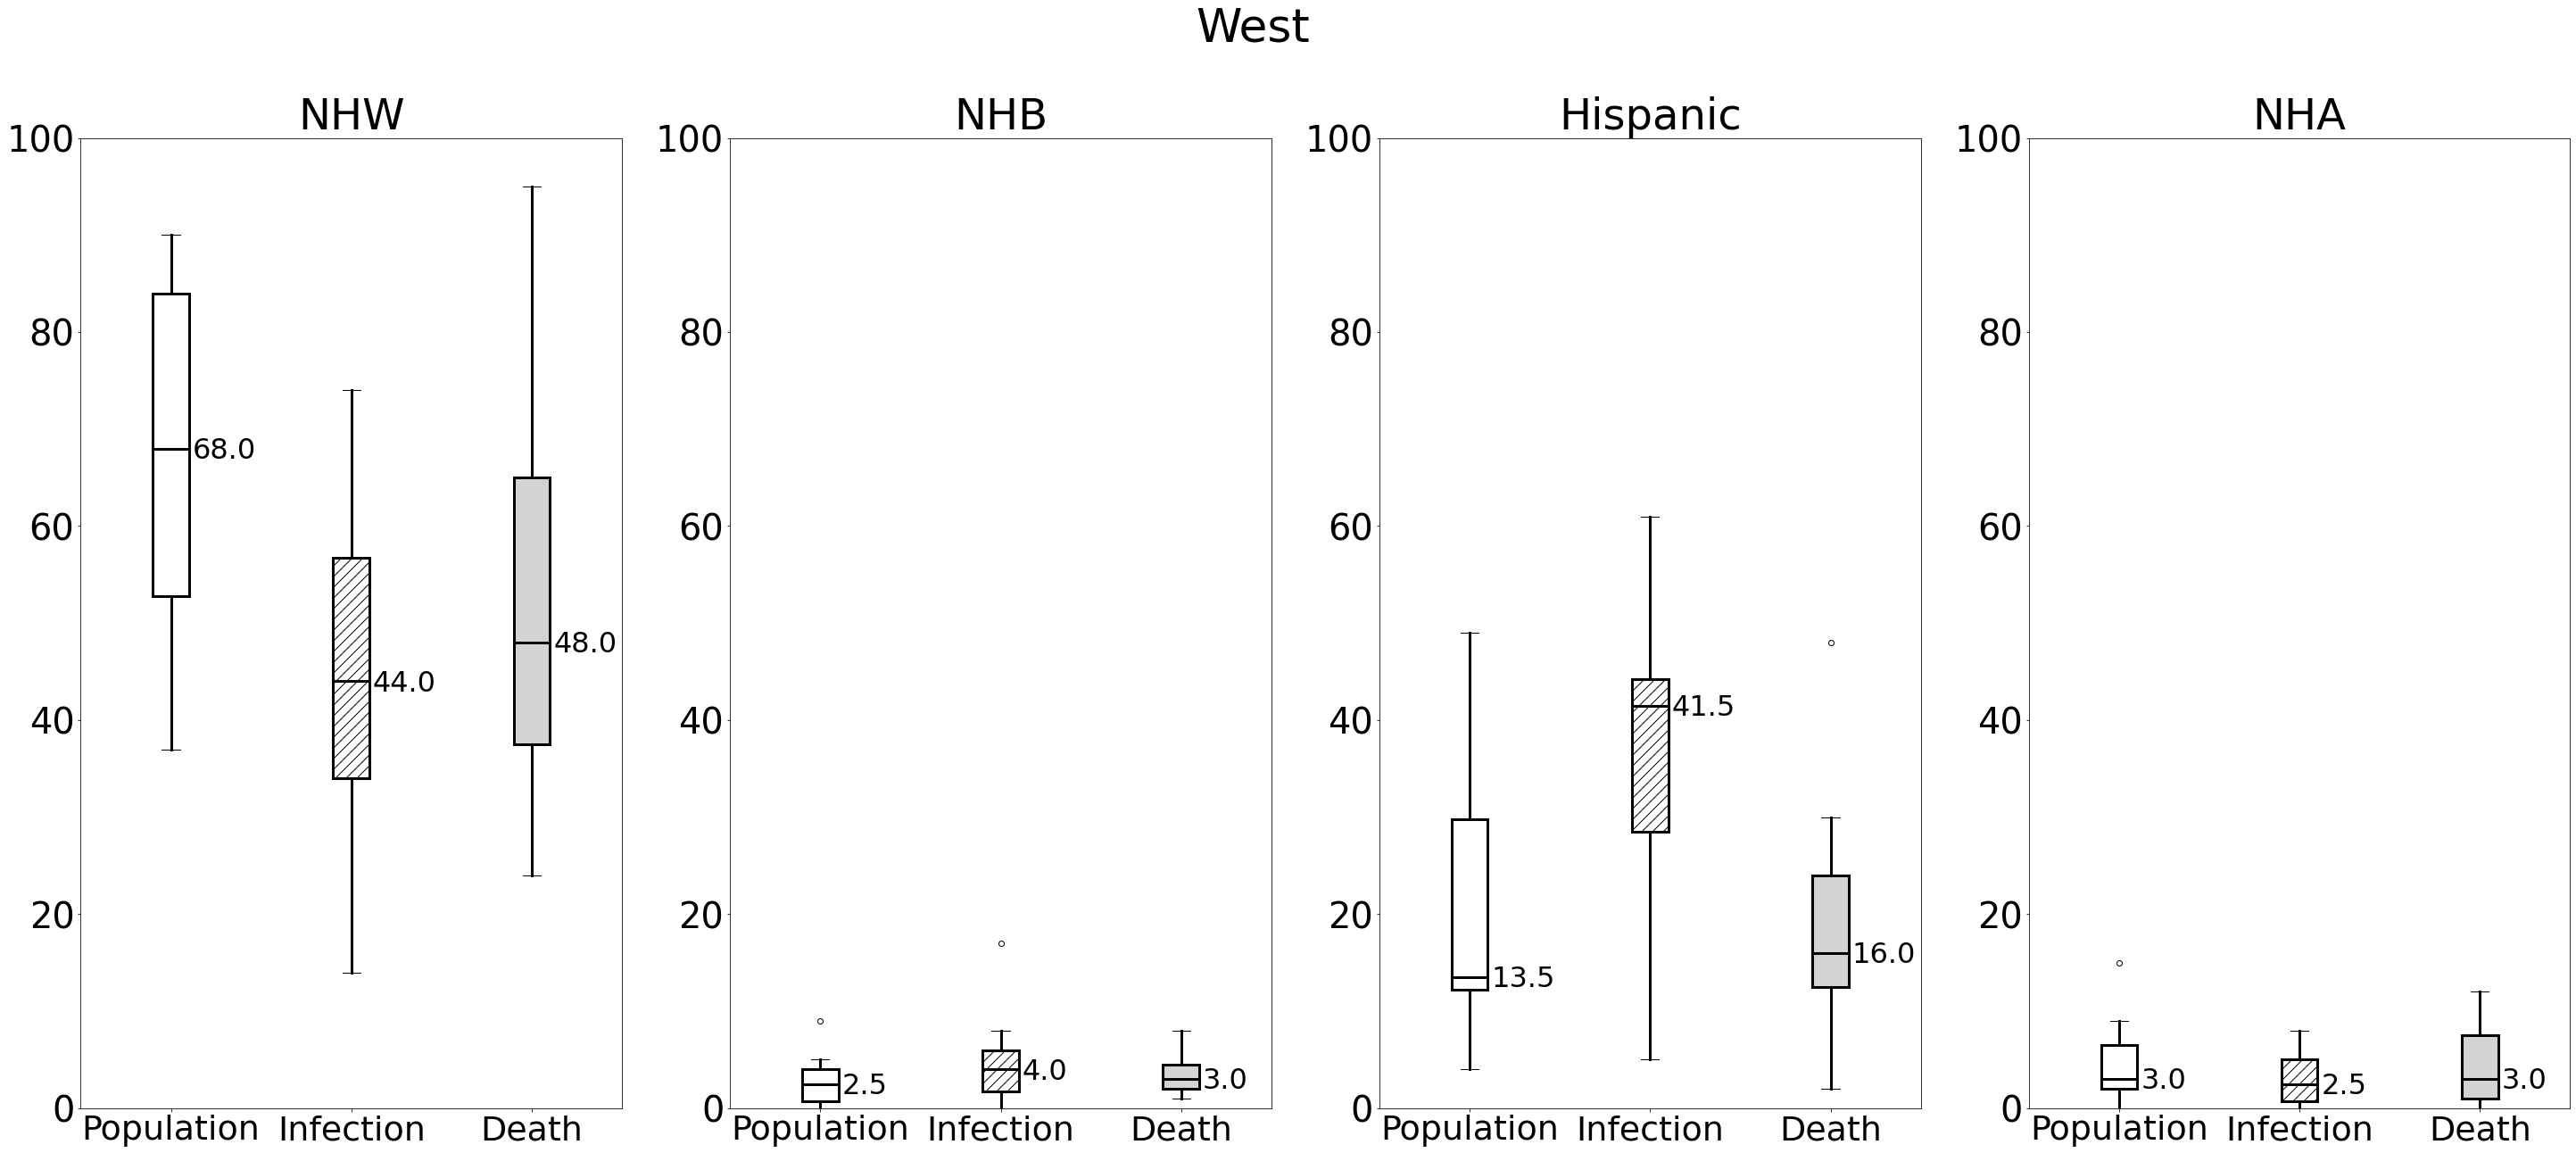

In [ ]:
raceindex = [1, 2, 3, 4]
race = ['', 'White', 'African-American', 'Hispanic', 'Asian']
racename = ['', 'NHW', 'NHB', 'Hispanic', 'NHA']

ne_pop = pop[pop['Region'] == 'West']
ne_deaths = deaths[deaths['Region'] == 'West']
ne_cases = cases[cases['Region'] == 'West']

fig, ax = plt.subplots(1, 4,figsize=(50,20))

for i in raceindex:
  p_data = ne_pop[ne_pop['Race/Ethnicity'] == race[i]]
  i_data = ne_cases[ne_cases['Race/Ethnicity'] == race[i]]
  d_data = ne_deaths[ne_deaths['Race/Ethnicity'] == race[i]]

  q2_p = [np.quantile(p_data['% of Population'].to_list(), 0.5)]
  q2_i = [np.quantile(i_data['% of Population'].to_list(), 0.5)]
  q2_d = [np.quantile(d_data['% of Population'].to_list(), 0.5)]

  pdata = []
  pdata.append(p_data['% of Population'].tolist())
  pdata.append(i_data['% of Population'].tolist())
  pdata.append(d_data['% of Population'].tolist())
  
  c = 'black'
  bp = ax[i-1].boxplot(pdata[0], labels = ['Population'], positions = [1], patch_artist=True, widths=0.2,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  # for box in bp['boxes']:
  #     box.set(hatch = '\\')
  
  c = 'black'
  bp = ax[i-1].boxplot(pdata[1], labels = ['Infection'], positions = [2], patch_artist=True, widths=0.2,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  for box in bp['boxes']:
      box.set(hatch = '//')

  c = 'black'
  bp = ax[i-1].boxplot(pdata[2], labels = ['Death'], positions = [3], patch_artist=True, widths=0.2,
            boxprops=dict(facecolor='lightgray', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  # for box in bp['boxes']:
  #     box.set(hatch = '//')

  ax[i-1].text(1+0.12, q2_p[0]-1, str(round(q2_p[0],2)), fontsize = 32)
  ax[i-1].text(2+0.12, q2_i[0]-1, str(round(q2_i[0],2)), fontsize = 32)
  ax[i-1].text(3+0.12, q2_d[0]-1, str(round(q2_d[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=38)

  ax[i-1].set_ylim(0, 100)

  ax[i-1].set_title(racename[i], fontsize = 48)

  print(race[i])
  print('Population Kruskal-Wallis', kruskal(p_data['% of Population'].tolist(), i_data['% of Population'].tolist(), d_data['% of Population'].tolist()))
  print(sp.posthoc_dunn([p_data['% of Population'].tolist(), i_data['% of Population'].tolist(), d_data['% of Population'].tolist()]))
  
plt.text(-3.8, 110, 'West',
         horizontalalignment='center',
         fontsize=52)
plt.savefig("West.svg")
plt.show()

White
Population Kruskal-Wallis KruskalResult(statistic=19.43372457498468, pvalue=6.025877895011809e-05)
          1         2         3
1  1.000000  0.000014  0.005582
2  0.000014  1.000000  0.128151
3  0.005582  0.128151  1.000000
African-American
Population Kruskal-Wallis KruskalResult(statistic=5.936801160615936, pvalue=0.05138543151234051)
          1         2         3
1  1.000000  0.015476  0.154152
2  0.015476  1.000000  0.334220
3  0.154152  0.334220  1.000000
Hispanic
Population Kruskal-Wallis KruskalResult(statistic=23.133350597161908, pvalue=9.476691518201134e-06)
          1         2         3
1  1.000000  0.000205  0.396382
2  0.000205  1.000000  0.000007
3  0.396382  0.000007  1.000000
Asian
Population Kruskal-Wallis KruskalResult(statistic=8.156509686445958, pvalue=0.016936997592408562)
          1         2         3
1  1.000000  0.056309  0.005319
2  0.056309  1.000000  0.371231
3  0.005319  0.371231  1.000000


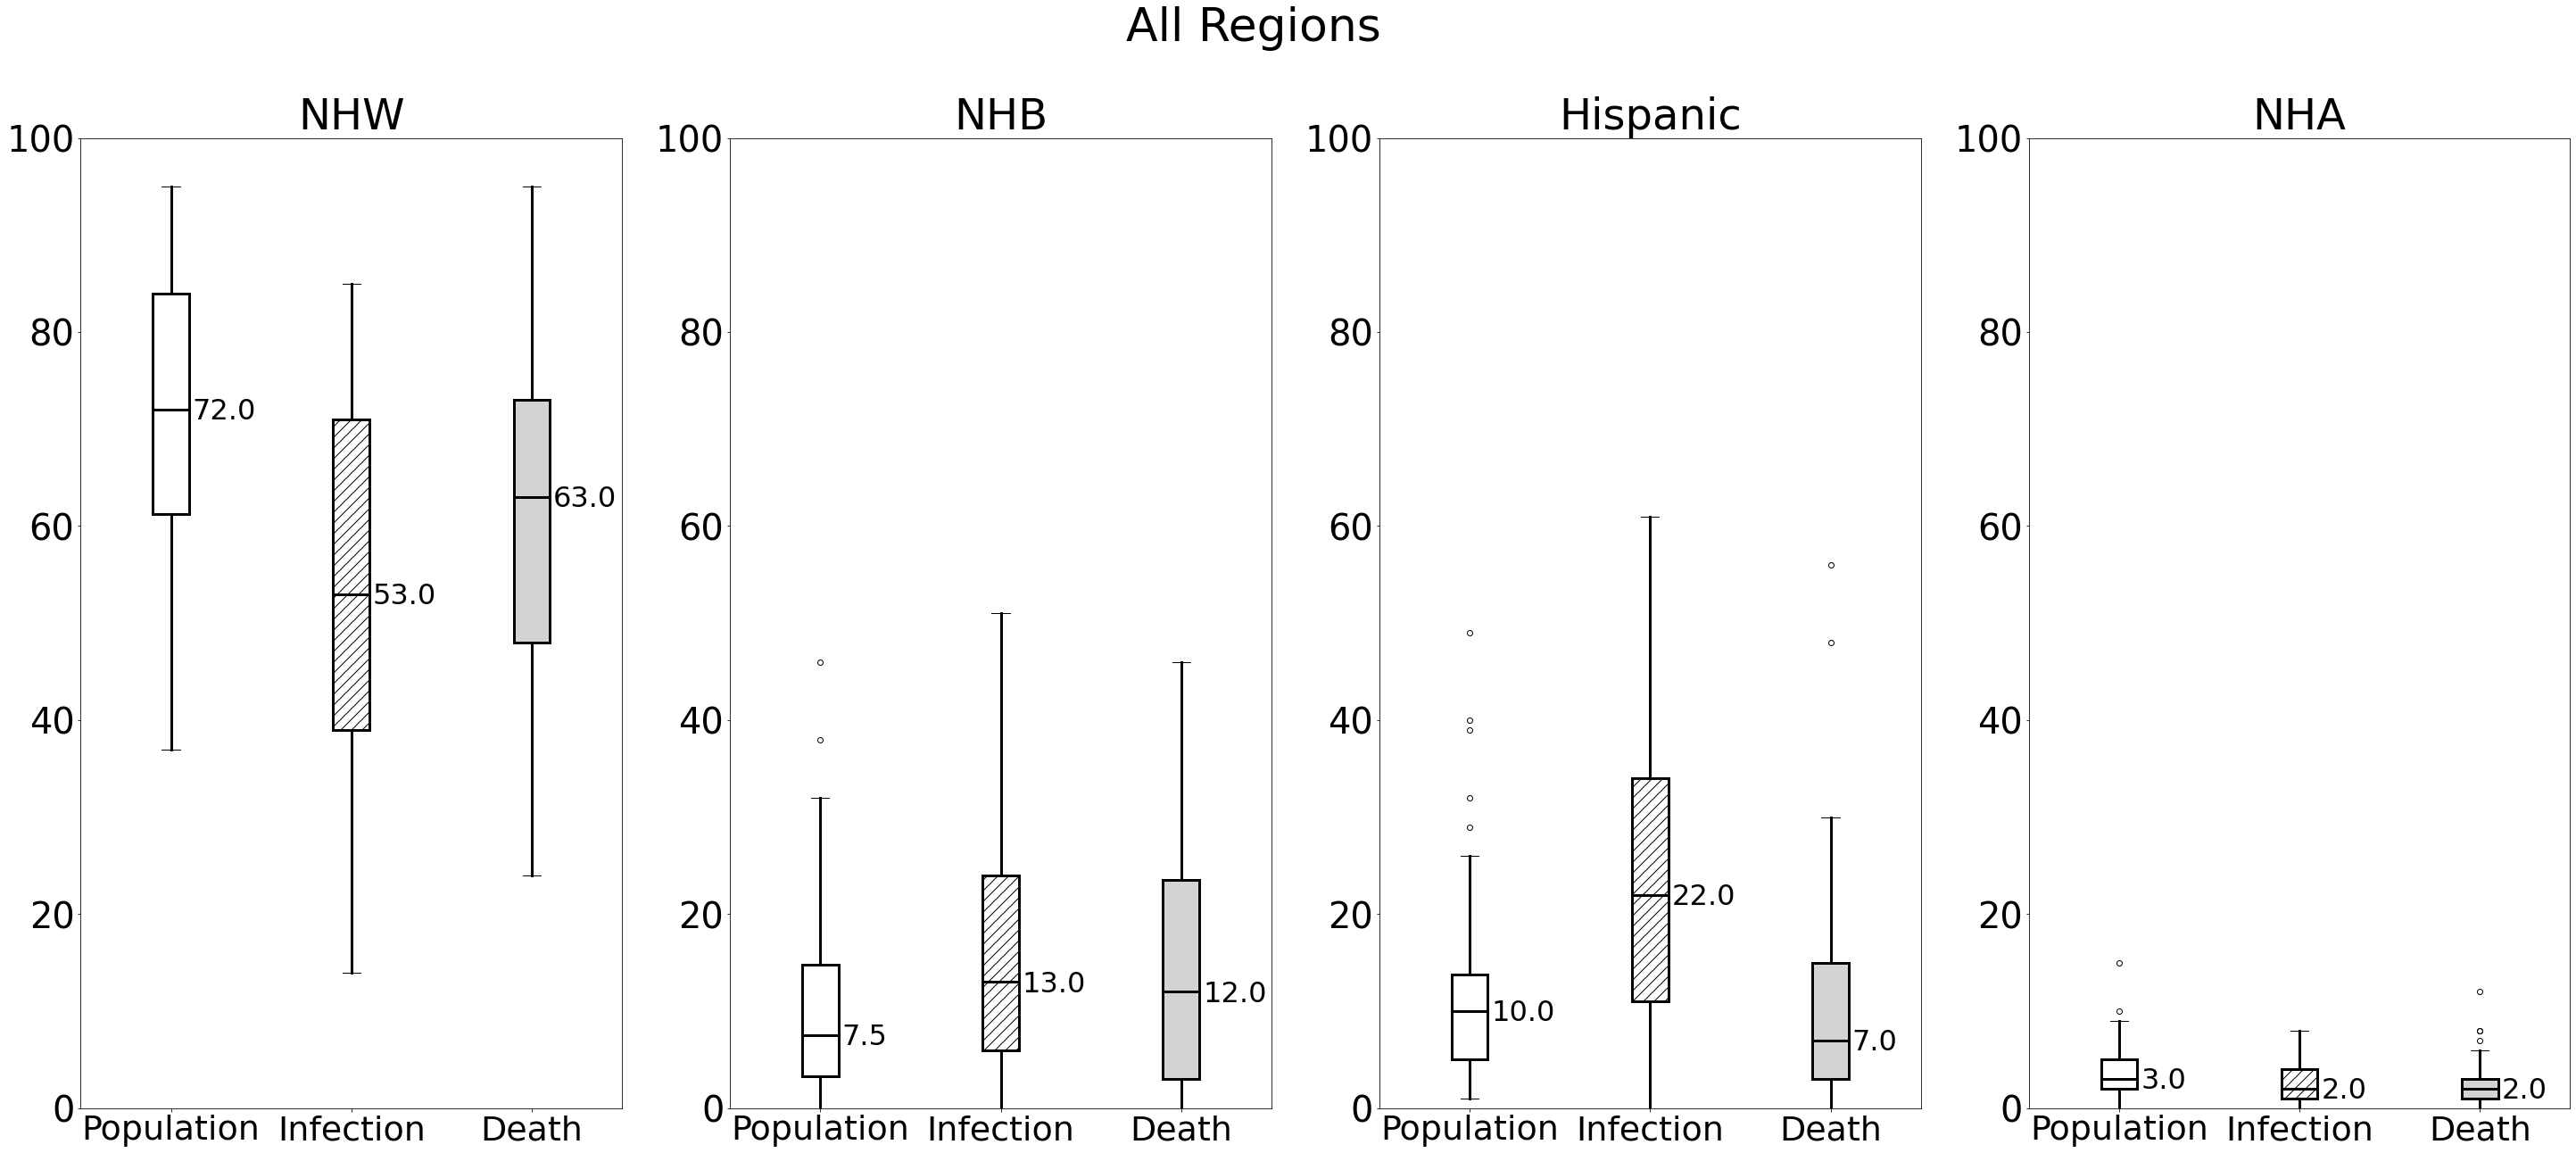

In [ ]:
raceindex = [1, 2, 3, 4]
race = ['', 'White', 'African-American', 'Hispanic', 'Asian']
racename = ['', 'NHW', 'NHB', 'Hispanic', 'NHA']

ne_pop = pop[pop['Region'] == 'All Regions']
ne_deaths = deaths[deaths['Region'] == 'All Regions']
ne_cases = cases[cases['Region'] == 'All Regions']

fig, ax = plt.subplots(1, 4,figsize=(50,20))

for i in raceindex:
  p_data = ne_pop[ne_pop['Race/Ethnicity'] == race[i]]
  i_data = ne_cases[ne_cases['Race/Ethnicity'] == race[i]]
  d_data = ne_deaths[ne_deaths['Race/Ethnicity'] == race[i]]

  q2_p = [np.quantile(p_data['% of Population'].to_list(), 0.5)]
  q2_i = [np.quantile(i_data['% of Population'].to_list(), 0.5)]
  q2_d = [np.quantile(d_data['% of Population'].to_list(), 0.5)]

  pdata = []
  pdata.append(p_data['% of Population'].tolist())
  pdata.append(i_data['% of Population'].tolist())
  pdata.append(d_data['% of Population'].tolist())
  
  c = 'black'
  bp = ax[i-1].boxplot(pdata[0], labels = ['Population'], positions = [1], patch_artist=True, widths=0.2,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  # for box in bp['boxes']:
  #     box.set(hatch = '\\')
  
  c = 'black'
  bp = ax[i-1].boxplot(pdata[1], labels = ['Infection'], positions = [2], patch_artist=True, widths=0.2,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  for box in bp['boxes']:
      box.set(hatch = '//')

  c = 'black'
  bp = ax[i-1].boxplot(pdata[2], labels = ['Death'], positions = [3], patch_artist=True, widths=0.2,
            boxprops=dict(facecolor='lightgray', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  # for box in bp['boxes']:
  #     box.set(hatch = '//')

  ax[i-1].text(1+0.12, q2_p[0]-1, str(round(q2_p[0],2)), fontsize = 32)
  ax[i-1].text(2+0.12, q2_i[0]-1, str(round(q2_i[0],2)), fontsize = 32)
  ax[i-1].text(3+0.12, q2_d[0]-1, str(round(q2_d[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=38)

  ax[i-1].set_ylim(0, 100)

  ax[i-1].set_title(racename[i], fontsize = 48)

  print(race[i])
  print('Population Kruskal-Wallis', kruskal(p_data['% of Population'].tolist(), i_data['% of Population'].tolist(), d_data['% of Population'].tolist()))
  print(sp.posthoc_dunn([p_data['% of Population'].tolist(), i_data['% of Population'].tolist(), d_data['% of Population'].tolist()]))
  
plt.text(-3.8, 110, 'All Regions',
         horizontalalignment='center',
         fontsize=52)
plt.savefig("All Regions.svg")
plt.show()

Midwest
Population Kruskal-Wallis KruskalResult(statistic=34.758918815559426, pvalue=1.3698246663184687e-07)
Population AA-As MannwhitneyuResult(statistic=20.0, pvalue=0.001234416105473281)
Population AA-HA MannwhitneyuResult(statistic=71.5, pvalue=0.5)
Population AA-Wh MannwhitneyuResult(statistic=0.0, pvalue=1.772823347913574e-05)
Population As-HA MannwhitneyuResult(statistic=11.5, pvalue=0.00023326602349477604)
Population As-Wh MannwhitneyuResult(statistic=0.0, pvalue=1.6117444991092472e-05)
Population HA-Wh MannwhitneyuResult(statistic=0.0, pvalue=1.731421110519402e-05)
Northeast
Population Kruskal-Wallis KruskalResult(statistic=21.630940082644628, pvalue=7.784295904433225e-05)
Population AA-As MannwhitneyuResult(statistic=31.5, pvalue=0.22492823322521227)
Population AA-HA MannwhitneyuResult(statistic=25.5, pvalue=0.09904024778581055)
Population AA-Wh MannwhitneyuResult(statistic=0.0, pvalue=0.00019912978949880025)
Population As-HA MannwhitneyuResult(statistic=22.5, pvalue=0.060752

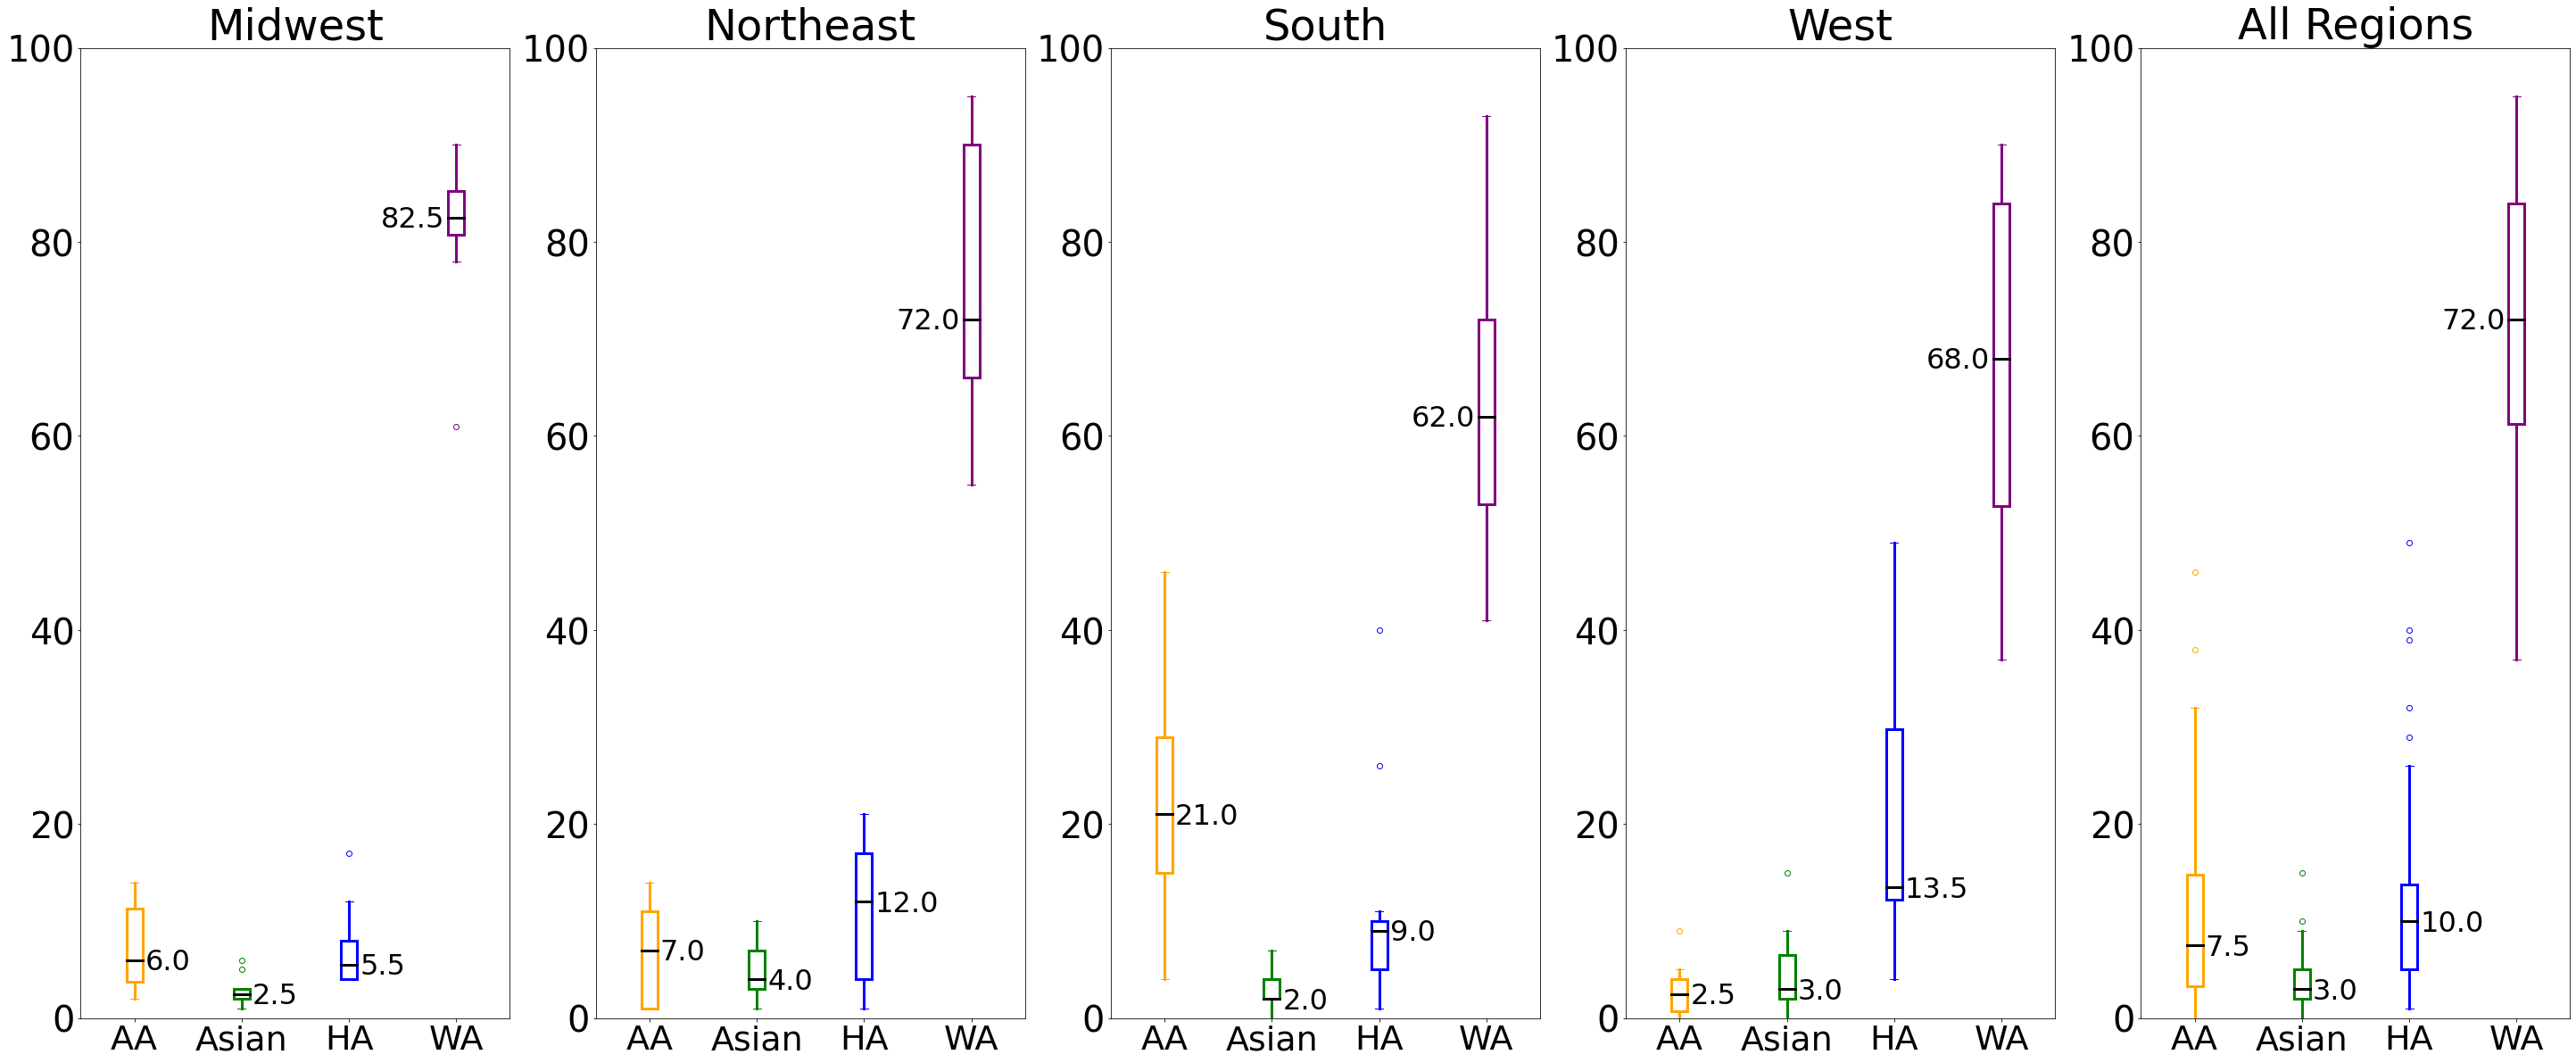

In [ ]:
rindex = [1, 2, 3, 4, 5]
region = ['', 'Midwest', 'Northeast', 'South', 'West', 'All Regions']

fig, ax = plt.subplots(1, 5,figsize=(50,20))

for i in rindex:
  data = pop[pop['Region'] == region[i]]

  AA = data[data['Race/Ethnicity'] == 'African-American']
  As = data[data['Race/Ethnicity'] == 'Asian']
  HA = data[data['Race/Ethnicity'] == 'Hispanic']
  Wh = data[data['Race/Ethnicity'] == 'White']

  q2AA = [np.quantile(AA['% of Population'].to_list(), 0.5)]
  q2As = [np.quantile(As['% of Population'].to_list(), 0.5)]
  q2HA = [np.quantile(HA['% of Population'].to_list(), 0.5)]
  q2Wh = [np.quantile(Wh['% of Population'].to_list(), 0.5)]

  pdata = []
  pdata.append(AA['% of Population'].tolist())
  pdata.append(As['% of Population'].tolist())
  pdata.append(HA['% of Population'].tolist())
  pdata.append(Wh['% of Population'].tolist())
  
  c = 'orange'
  ax[i-1].boxplot(pdata[0], labels = ['AA'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))
  
  c = 'green'
  ax[i-1].boxplot(pdata[1], labels = ['Asian'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))
  
  c = 'blue'
  ax[i-1].boxplot(pdata[2], labels = ['HA'], positions = [3], patch_artist=True,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  c = 'purple'
  ax[i-1].boxplot(pdata[3], labels = ['WA'], positions = [4], patch_artist=True,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  ax[i-1].text(1+0.1, q2AA[0]-1, str(round(q2AA[0],2)), fontsize = 32)
  ax[i-1].text(2+0.1, q2As[0]-1, str(round(q2As[0],2)), fontsize = 32)
  ax[i-1].text(3+0.1, q2HA[0]-1, str(round(q2HA[0],2)), fontsize = 32)
  ax[i-1].text(4-0.7, q2Wh[0]-1, str(round(q2Wh[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=38)

  ax[i-1].set_ylim(0, 100)

  ax[i-1].set_title(region[i], fontsize = 48)

  print(region[i])
  print('Population Kruskal-Wallis', kruskal(AA['% of Population'].tolist(), As['% of Population'].tolist(), HA['% of Population'].tolist(), Wh['% of Population'].tolist()))
  print('Population AA-As', mannwhitneyu(AA['% of Population'].tolist(), As['% of Population'].tolist()))
  print('Population AA-HA', mannwhitneyu(AA['% of Population'].tolist(), HA['% of Population'].tolist()))
  print('Population AA-Wh', mannwhitneyu(AA['% of Population'].tolist(), Wh['% of Population'].tolist()))
  print('Population As-HA', mannwhitneyu(As['% of Population'].tolist(), HA['% of Population'].tolist()))
  print('Population As-Wh', mannwhitneyu(As['% of Population'].tolist(), Wh['% of Population'].tolist()))
  print('Population HA-Wh', mannwhitneyu(HA['% of Population'].tolist(), Wh['% of Population'].tolist()))

Midwest
Infection Kruskal-Wallis KruskalResult(statistic=37.642111032595864, pvalue=3.365160770510985e-08)
Infection AA-As MannwhitneyuResult(statistic=0.5, pvalue=1.955973751789783e-05)
Infection AA-HA MannwhitneyuResult(statistic=61.0, pvalue=0.2716141969310898)
Infection AA-Wh MannwhitneyuResult(statistic=0.0, pvalue=1.814996792052261e-05)
Infection As-HA MannwhitneyuResult(statistic=11.5, pvalue=0.00025499552975209754)
Infection As-Wh MannwhitneyuResult(statistic=0.0, pvalue=1.7451367689856324e-05)
Infection HA-Wh MannwhitneyuResult(statistic=0.0, pvalue=1.814996792052261e-05)
Northeast
Infection Kruskal-Wallis KruskalResult(statistic=24.66213668138337, pvalue=1.8167118850456506e-05)
Infection AA-As MannwhitneyuResult(statistic=0.5, pvalue=0.000523816541539232)
Infection AA-HA MannwhitneyuResult(statistic=20.0, pvalue=0.11323126073387646)
Infection AA-Wh MannwhitneyuResult(statistic=0.0, pvalue=0.000465486135787501)
Infection As-HA MannwhitneyuResult(statistic=4.0, pvalue=0.0017475

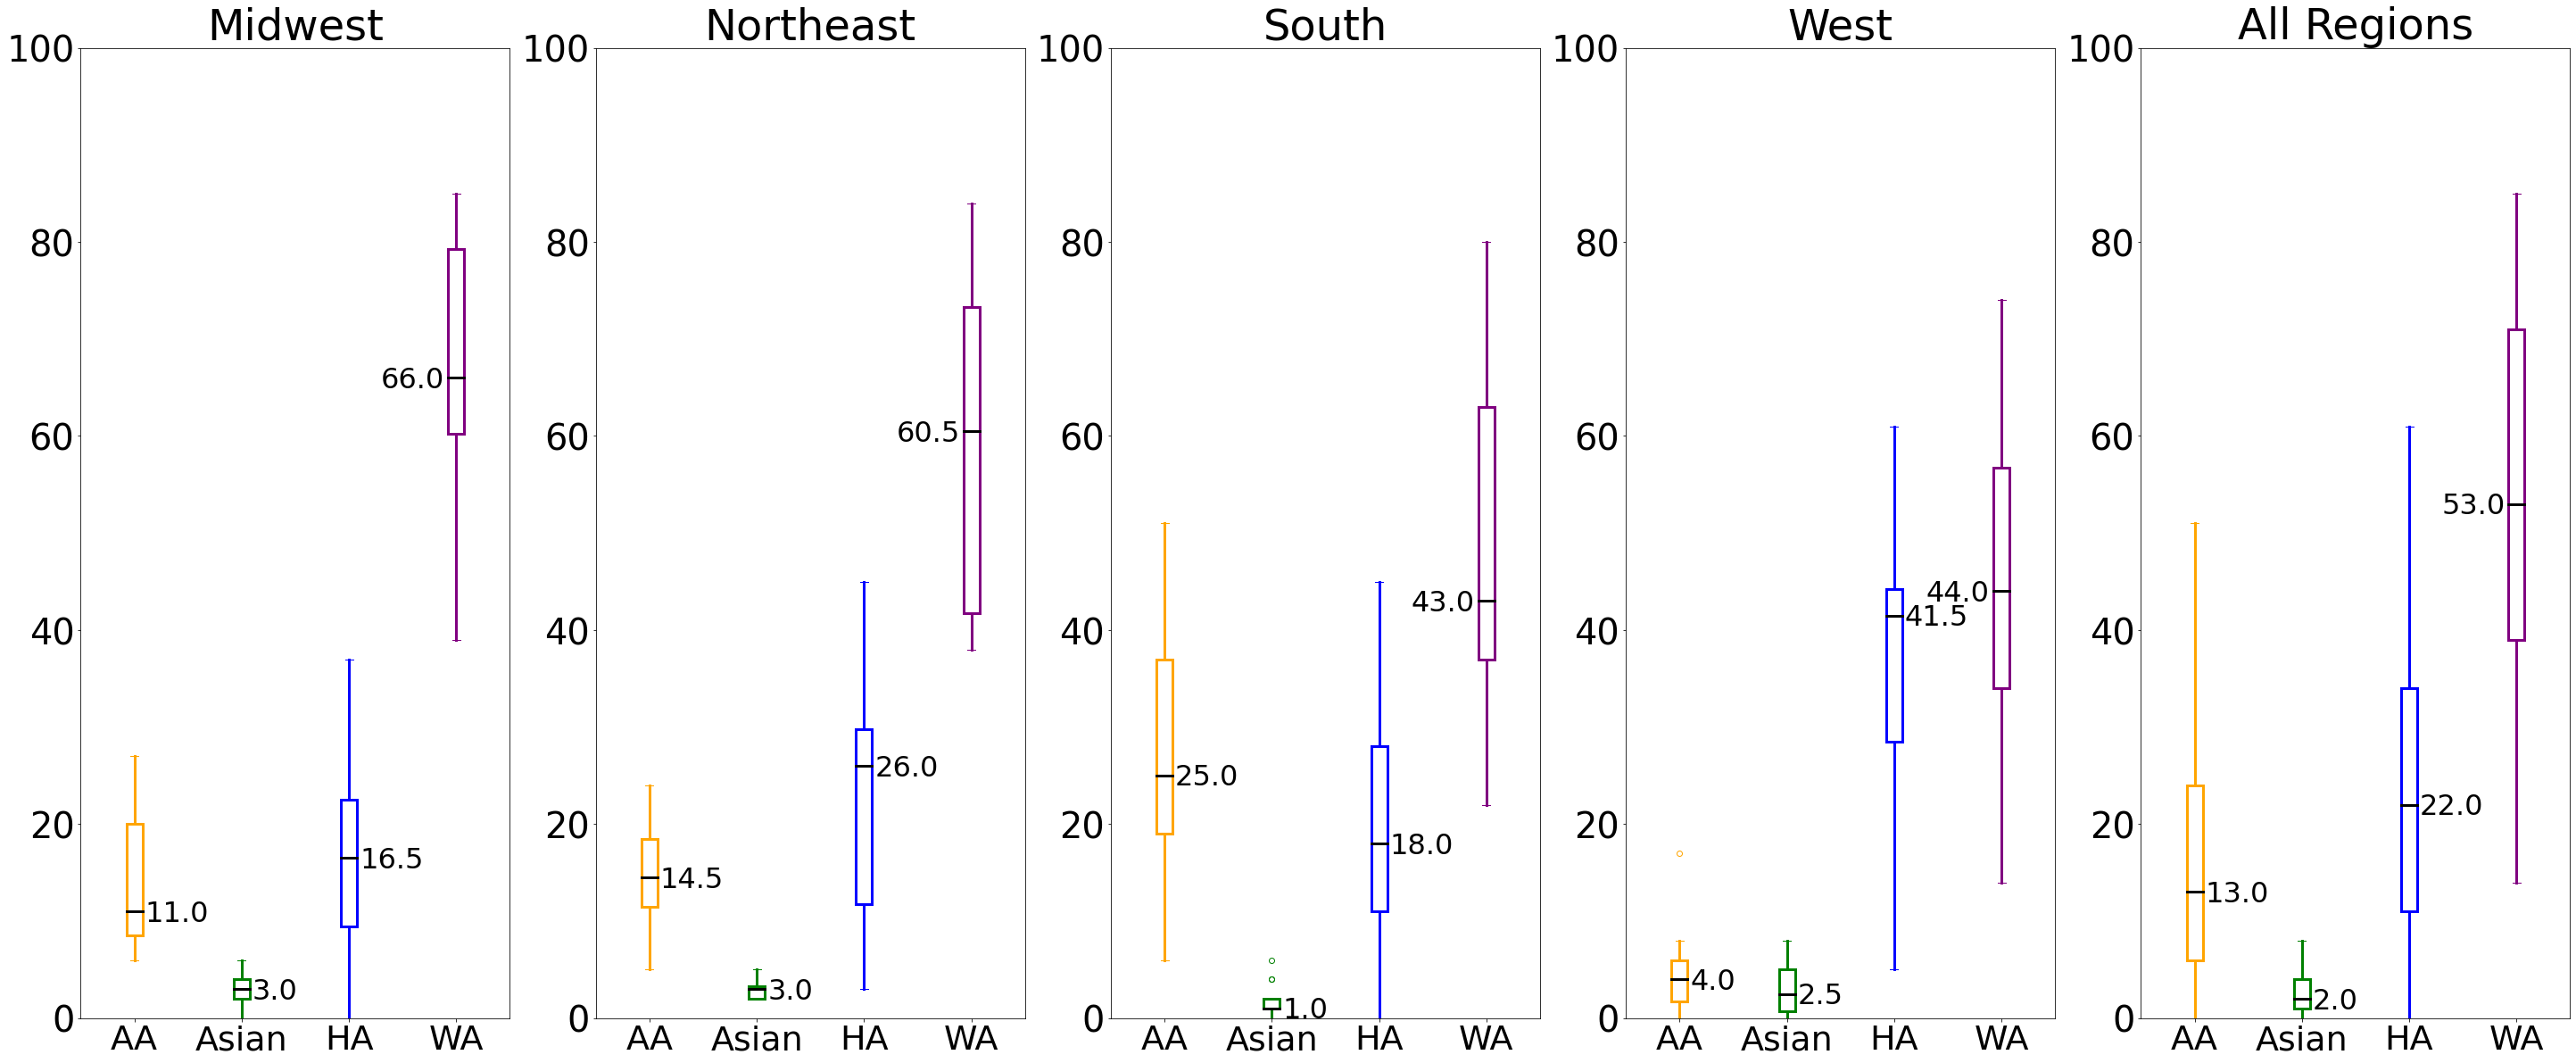

In [ ]:
rindex = [1, 2, 3, 4, 5]
region = ['', 'Midwest', 'Northeast', 'South', 'West', 'All Regions']

fig, ax = plt.subplots(1, 5,figsize=(50,20))

for i in rindex:
  data = cases[cases['Region'] == region[i]]

  AA = data[data['Race/Ethnicity'] == 'African-American']
  As = data[data['Race/Ethnicity'] == 'Asian']
  HA = data[data['Race/Ethnicity'] == 'Hispanic']
  Wh = data[data['Race/Ethnicity'] == 'White']

  q2AA = [np.quantile(AA['% of Population'].to_list(), 0.5)]
  q2As = [np.quantile(As['% of Population'].to_list(), 0.5)]
  q2HA = [np.quantile(HA['% of Population'].to_list(), 0.5)]
  q2Wh = [np.quantile(Wh['% of Population'].to_list(), 0.5)]

  pdata = []
  pdata.append(AA['% of Population'].tolist())
  pdata.append(As['% of Population'].tolist())
  pdata.append(HA['% of Population'].tolist())
  pdata.append(Wh['% of Population'].tolist())
  
  c = 'orange'
  ax[i-1].boxplot(pdata[0], labels = ['AA'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))
  
  c = 'green'
  ax[i-1].boxplot(pdata[1], labels = ['Asian'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))
  
  c = 'blue'
  ax[i-1].boxplot(pdata[2], labels = ['HA'], positions = [3], patch_artist=True,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  c = 'purple'
  ax[i-1].boxplot(pdata[3], labels = ['WA'], positions = [4], patch_artist=True,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  ax[i-1].text(1+0.1, q2AA[0]-1, str(round(q2AA[0],2)), fontsize = 32)
  ax[i-1].text(2+0.1, q2As[0]-1, str(round(q2As[0],2)), fontsize = 32)
  ax[i-1].text(3+0.1, q2HA[0]-1, str(round(q2HA[0],2)), fontsize = 32)
  ax[i-1].text(4-0.7, q2Wh[0]-1, str(round(q2Wh[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=38)

  ax[i-1].set_ylim(0, 100)

  ax[i-1].set_title(region[i], fontsize = 48)
  
  print(region[i])
  print('Infection Kruskal-Wallis', kruskal(AA['% of Population'].tolist(), As['% of Population'].tolist(), HA['% of Population'].tolist(), Wh['% of Population'].tolist()))
  print('Infection AA-As', mannwhitneyu(AA['% of Population'].tolist(), As['% of Population'].tolist()))
  print('Infection AA-HA', mannwhitneyu(AA['% of Population'].tolist(), HA['% of Population'].tolist()))
  print('Infection AA-Wh', mannwhitneyu(AA['% of Population'].tolist(), Wh['% of Population'].tolist()))
  print('Infection As-HA', mannwhitneyu(As['% of Population'].tolist(), HA['% of Population'].tolist()))
  print('Infection As-Wh', mannwhitneyu(As['% of Population'].tolist(), Wh['% of Population'].tolist()))
  print('Infection HA-Wh', mannwhitneyu(HA['% of Population'].tolist(), Wh['% of Population'].tolist()))

Midwest
Deaths Kruskal-Wallis KruskalResult(statistic=31.747068331540966, pvalue=5.916826073765589e-07)
Deaths AA-As MannwhitneyuResult(statistic=10.5, pvalue=0.0005274085895315526)
Deaths AA-HA MannwhitneyuResult(statistic=35.0, pvalue=0.04994927321995728)
Deaths AA-Wh MannwhitneyuResult(statistic=0.0, pvalue=4.0381060080300705e-05)
Deaths As-HA MannwhitneyuResult(statistic=23.5, pvalue=0.007375508296649979)
Deaths As-Wh MannwhitneyuResult(statistic=0.0, pvalue=3.781852993971815e-05)
Deaths HA-Wh MannwhitneyuResult(statistic=0.0, pvalue=3.926711237723342e-05)
Northeast
Deaths Kruskal-Wallis KruskalResult(statistic=23.04156623048669, pvalue=3.9585358054287094e-05)
Deaths AA-As MannwhitneyuResult(statistic=16.5, pvalue=0.018444966406765562)
Deaths AA-HA MannwhitneyuResult(statistic=38.5, pvalue=0.4472316339868449)
Deaths AA-Wh MannwhitneyuResult(statistic=0.0, pvalue=0.0002047300544265788)
Deaths As-HA MannwhitneyuResult(statistic=18.0, pvalue=0.025183438210742686)
Deaths As-Wh Mannwhit

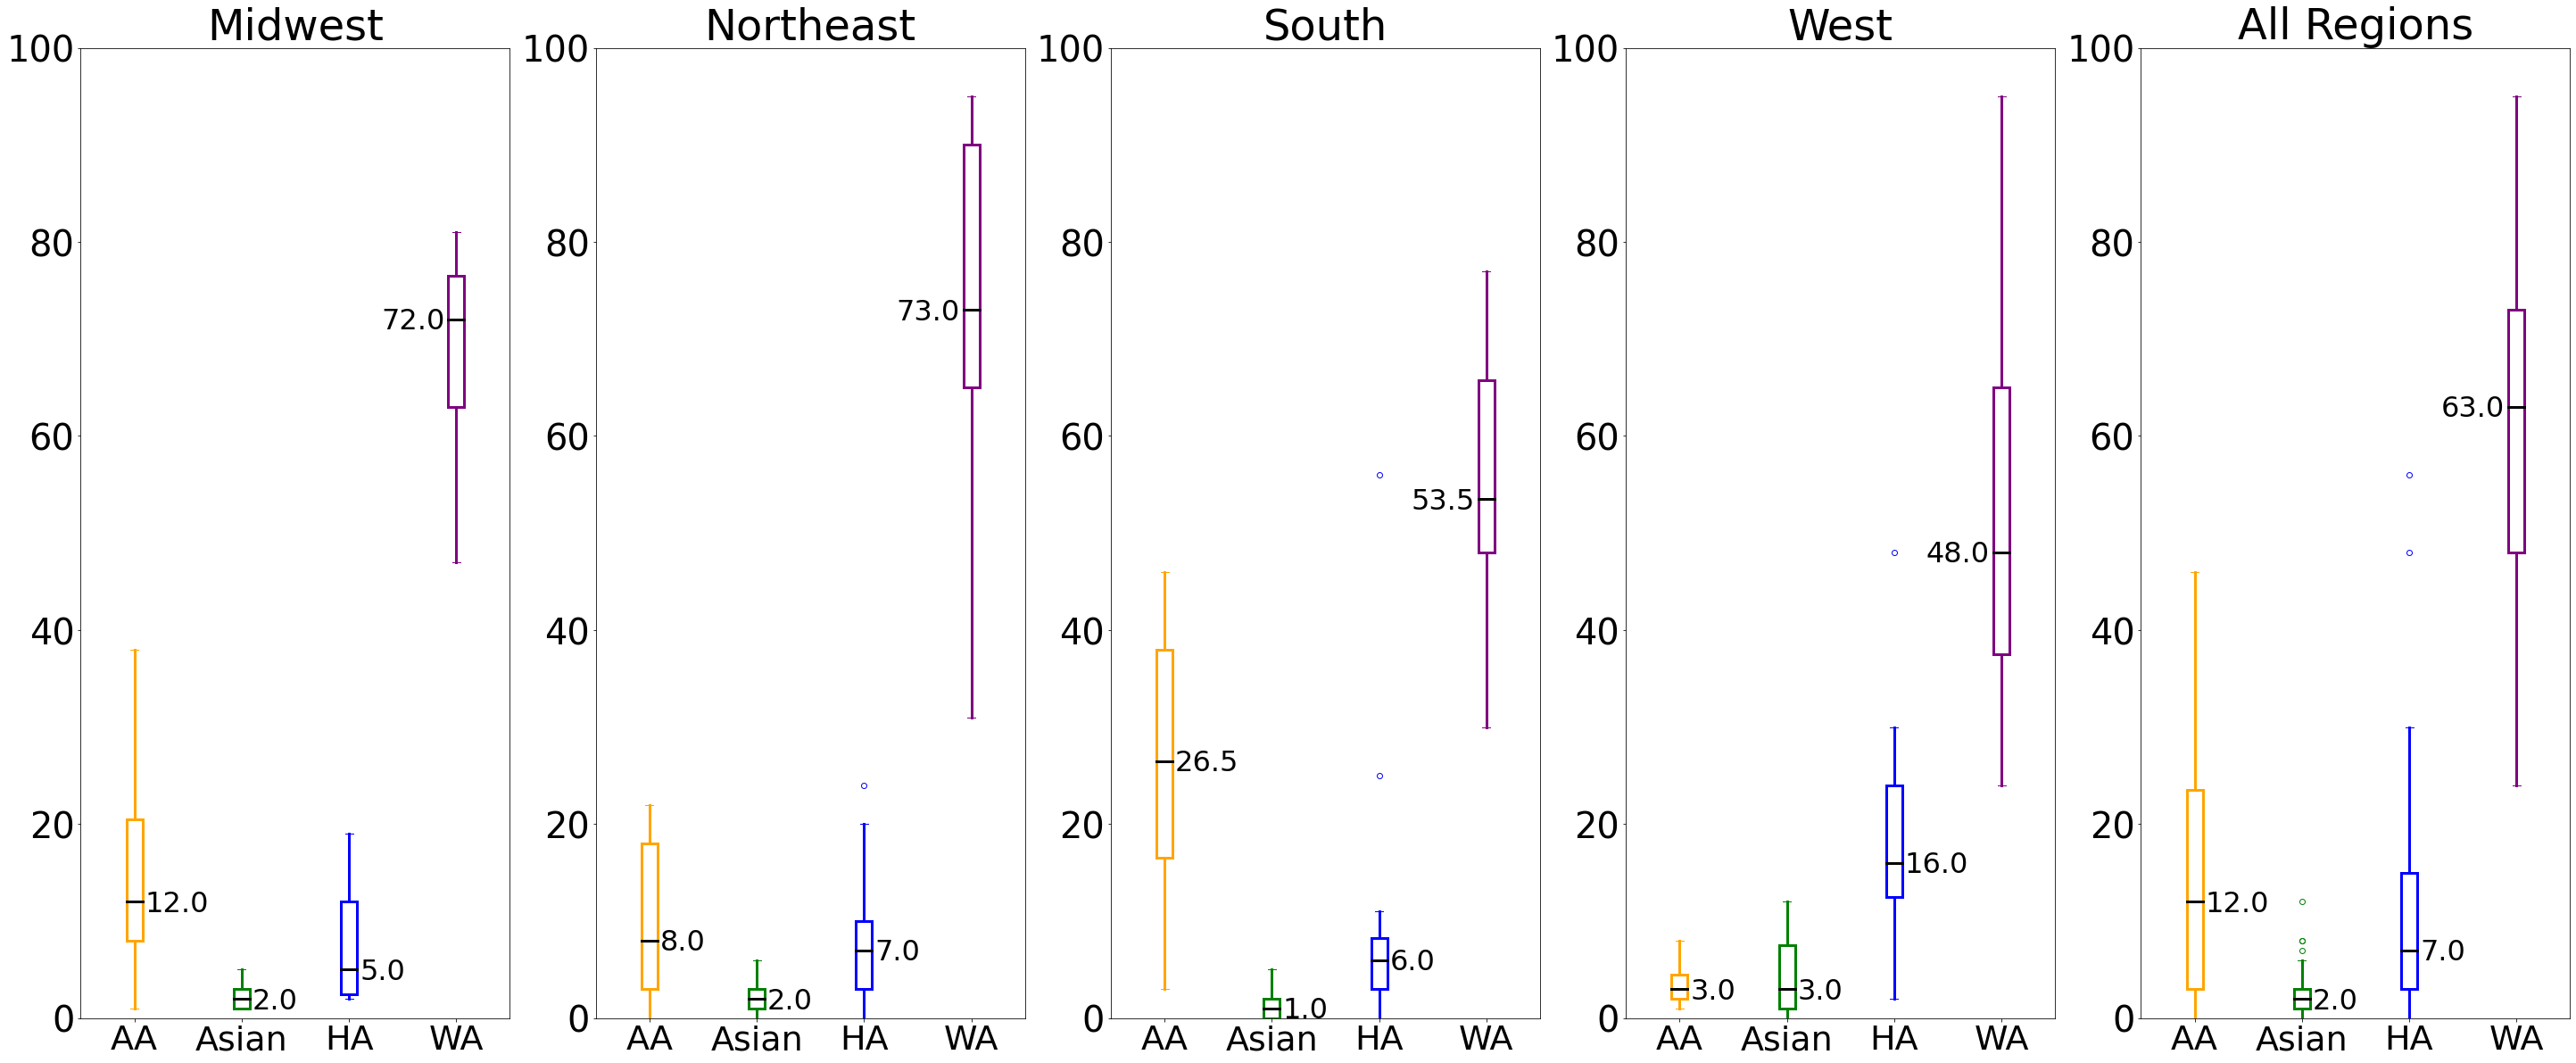

In [ ]:
rindex = [1, 2, 3, 4, 5]
region = ['', 'Midwest', 'Northeast', 'South', 'West', 'All Regions']

fig, ax = plt.subplots(1, 5,figsize=(50,20))

for i in rindex:
  data = deaths[deaths['Region'] == region[i]]

  AA = data[data['Race/Ethnicity'] == 'African-American']
  As = data[data['Race/Ethnicity'] == 'Asian']
  HA = data[data['Race/Ethnicity'] == 'Hispanic']
  Wh = data[data['Race/Ethnicity'] == 'White']

  q2AA = [np.quantile(AA['% of Population'].to_list(), 0.5)]
  q2As = [np.quantile(As['% of Population'].to_list(), 0.5)]
  q2HA = [np.quantile(HA['% of Population'].to_list(), 0.5)]
  q2Wh = [np.quantile(Wh['% of Population'].to_list(), 0.5)]

  pdata = []
  pdata.append(AA['% of Population'].tolist())
  pdata.append(As['% of Population'].tolist())
  pdata.append(HA['% of Population'].tolist())
  pdata.append(Wh['% of Population'].tolist())
  
  c = 'orange'
  ax[i-1].boxplot(pdata[0], labels = ['AA'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))
  
  c = 'green'
  ax[i-1].boxplot(pdata[1], labels = ['Asian'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))
  
  c = 'blue'
  ax[i-1].boxplot(pdata[2], labels = ['HA'], positions = [3], patch_artist=True,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  c = 'purple'
  ax[i-1].boxplot(pdata[3], labels = ['WA'], positions = [4], patch_artist=True,
            boxprops=dict(facecolor='w', color=c, linewidth=3.0),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, linewidth=3.0),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black', linewidth=3.0))

  ax[i-1].text(1+0.1, q2AA[0]-1, str(round(q2AA[0],2)), fontsize = 32)
  ax[i-1].text(2+0.1, q2As[0]-1, str(round(q2As[0],2)), fontsize = 32)
  ax[i-1].text(3+0.1, q2HA[0]-1, str(round(q2HA[0],2)), fontsize = 32)
  ax[i-1].text(4-0.7, q2Wh[0]-1, str(round(q2Wh[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=38)

  ax[i-1].set_ylim(0, 100)

  ax[i-1].set_title(region[i], fontsize = 48)

  print(region[i])
  print('Deaths Kruskal-Wallis', kruskal(AA['% of Population'].tolist(), As['% of Population'].tolist(), HA['% of Population'].tolist(), Wh['% of Population'].tolist()))
  print('Deaths AA-As', mannwhitneyu(AA['% of Population'].tolist(), As['% of Population'].tolist()))
  print('Deaths AA-HA', mannwhitneyu(AA['% of Population'].tolist(), HA['% of Population'].tolist()))
  print('Deaths AA-Wh', mannwhitneyu(AA['% of Population'].tolist(), Wh['% of Population'].tolist()))
  print('Deaths As-HA', mannwhitneyu(As['% of Population'].tolist(), HA['% of Population'].tolist()))
  print('Deaths As-Wh', mannwhitneyu(As['% of Population'].tolist(), Wh['% of Population'].tolist()))
  print('Deaths HA-Wh', mannwhitneyu(HA['% of Population'].tolist(), Wh['% of Population'].tolist()))